<a href="https://colab.research.google.com/github/sanulisiya/20241263TeamMate/blob/main/Machine_Learning_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This cell installs and imports all necessary libraries for our project

# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes sure plots appear in our notebook
%matplotlib inline

# Make plots look nicer
sns.set_style("whitegrid")

print("All libraries imported successfully!")


All libraries imported successfully!


**Task 1**

In [2]:
# Load the Telco Customer Churn dataset from GitHub
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Let's see what we loaded
print("Dataset loaded successfully!")
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset loaded successfully!
The dataset has 7043 rows and 21 columns

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# === DETAILED DATA INSPECTION ===

# 1. Check the data types and missing values
print("=== DATASET INFO ===")
df.info()

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [5]:
# 2. Check for missing values explicitly
print("=== MISSING VALUES ===")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])  # Only show columns with missing values

=== MISSING VALUES ===
Series([], dtype: int64)


In [6]:
# 3. Get statistical summary of numerical columns
print("=== NUMERICAL COLUMNS STATISTICS ===")
df.describe()

=== NUMERICAL COLUMNS STATISTICS ===


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# 4. Check categorical columns
print("=== CATEGORICAL COLUMNS ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

# Show unique values in a few important categorical columns
print("\n=== UNIQUE VALUES IN KEY CATEGORICAL COLUMNS ===")
print("Churn values:", df['Churn'].unique())
print("Contract types:", df['Contract'].unique())
print("Payment methods:", df['PaymentMethod'].unique())

=== CATEGORICAL COLUMNS ===
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

=== UNIQUE VALUES IN KEY CATEGORICAL COLUMNS ===
Churn values: ['No' 'Yes']
Contract types: ['Month-to-month' 'One year' 'Two year']
Payment methods: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [11]:
# 5. Check the target variable distribution
print("=== TARGET VARIABLE DISTRIBUTION (CHURN) ===")
churn_distribution = df['Churn'].value_counts()
print(churn_distribution)

# Calculate percentages
print("\n=== CHURN PERCENTAGES ===")
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
print(churn_percentages)

=== TARGET VARIABLE DISTRIBUTION (CHURN) ===
Churn
No     5174
Yes    1869
Name: count, dtype: int64

=== CHURN PERCENTAGES ===
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


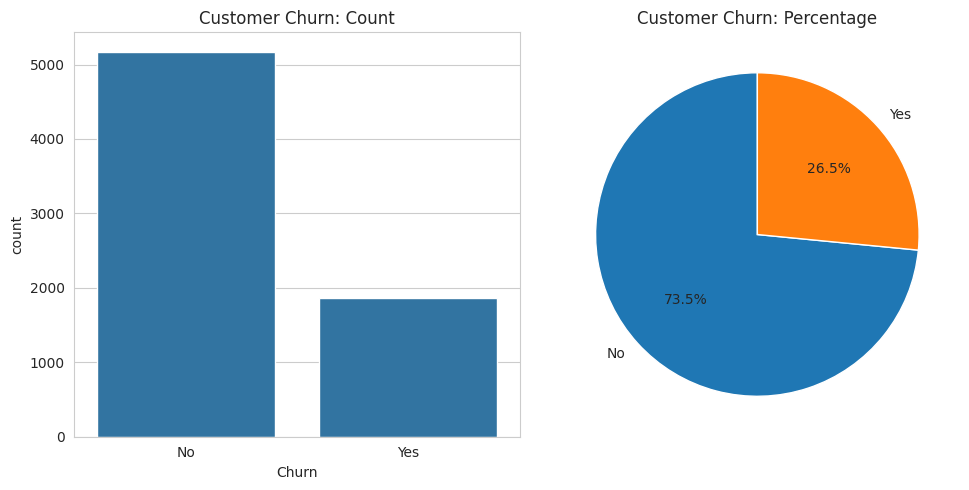

Customers who DID NOT churn: 5174 (73.5%)
Customers who CHURNED: 1869 (26.5%)


In [12]:
# === VISUALIZE CHURN DISTRIBUTION ===
plt.figure(figsize=(10, 5))

# First subplot - Count plot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Churn')
plt.title('Customer Churn: Count')

# Second subplot - Pie chart
plt.subplot(1, 2, 2)
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn: Percentage')

plt.tight_layout()
plt.show()

# Print the exact numbers
print(f"Customers who DID NOT churn: {churn_counts['No']} ({churn_counts['No']/len(df)*100:.1f}%)")
print(f"Customers who CHURNED: {churn_counts['Yes']} ({churn_counts['Yes']/len(df)*100:.1f}%)")

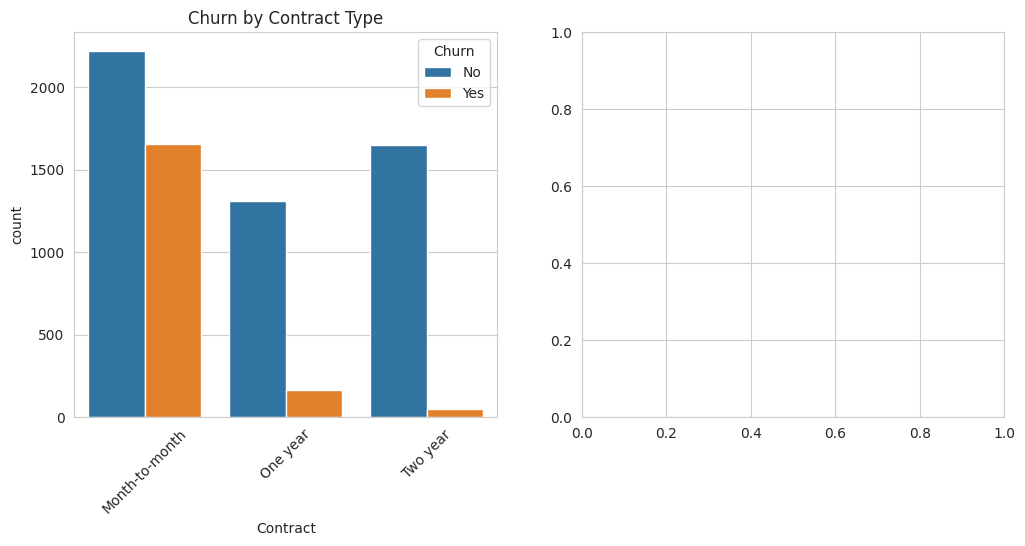

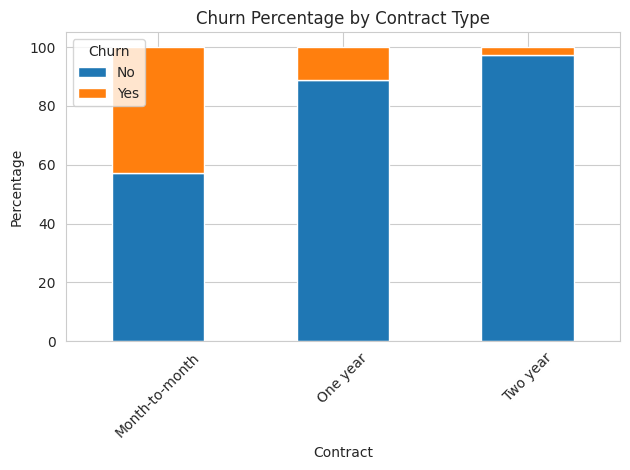

In [13]:
# === HOW CONTRACT TYPE AFFECTS CHURN ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
# Calculate churn rates by contract type
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn Percentage by Contract Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

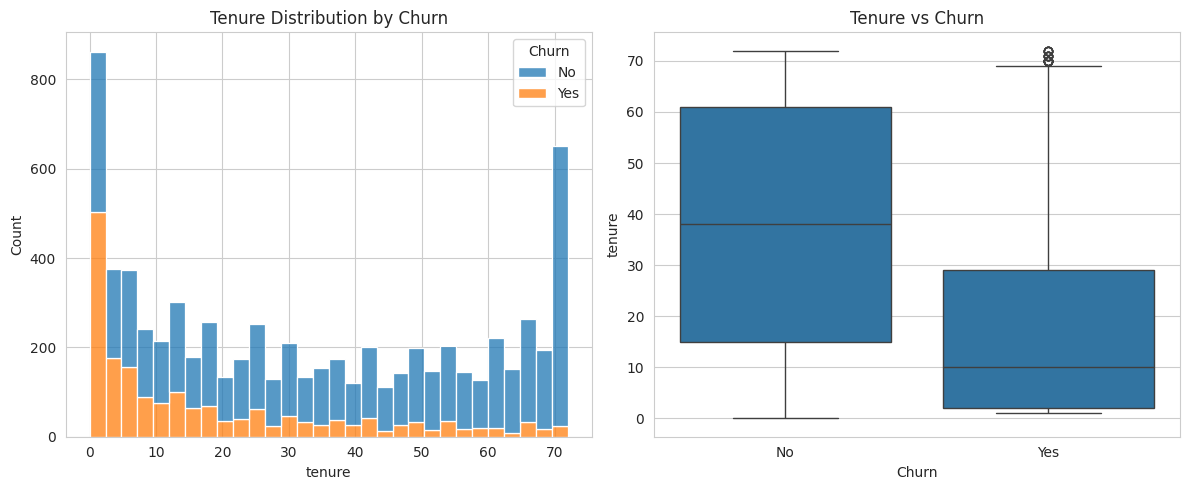

In [14]:
# === HOW TENURE AFFECTS CHURN ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tenure', hue='Churn', multiple="stack", bins=30)
plt.title('Tenure Distribution by Churn')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')

plt.tight_layout()
plt.show()

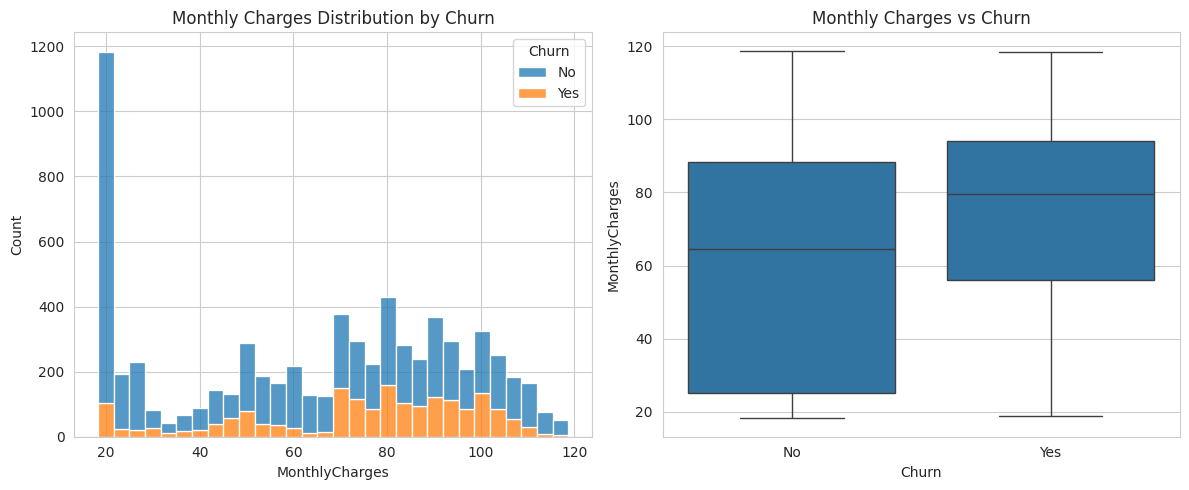

In [15]:
# === HOW MONTHLY CHARGES AFFECT CHURN ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple="stack", bins=30)
plt.title('Monthly Charges Distribution by Churn')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')

plt.tight_layout()
plt.show()

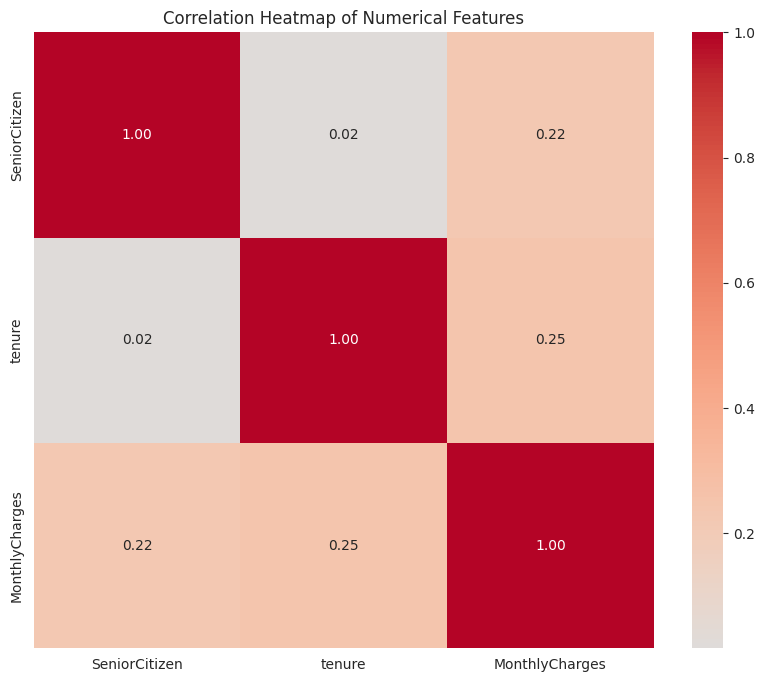

In [16]:
# === CORRELATION BETWEEN NUMERICAL FEATURES ===
plt.figure(figsize=(10, 8))

# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [17]:
# === DATA QUALITY CHECK ===
print("=== DATA QUALITY SUMMARY ===")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Check for any whitespace or strange values in categorical columns
print("\n=== CHECKING FOR DATA ISSUES ===")
for col in df.select_dtypes(include=['object']).columns:
    if col != 'customerID':  # Skip customer ID
        unique_vals = df[col].unique()
        print(f"{col}: {len(unique_vals)} unique values")
        if len(unique_vals) < 10:  # Only show if not too many values
            print(f"   Values: {unique_vals}")

=== DATA QUALITY SUMMARY ===
Total missing values: 0
Duplicate rows: 0

=== CHECKING FOR DATA ISSUES ===
gender: 2 unique values
   Values: ['Female' 'Male']
Partner: 2 unique values
   Values: ['Yes' 'No']
Dependents: 2 unique values
   Values: ['No' 'Yes']
PhoneService: 2 unique values
   Values: ['No' 'Yes']
MultipleLines: 3 unique values
   Values: ['No phone service' 'No' 'Yes']
InternetService: 3 unique values
   Values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
OnlineBackup: 3 unique values
   Values: ['Yes' 'No' 'No internet service']
DeviceProtection: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
TechSupport: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
StreamingTV: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
StreamingMovies: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
Contract: 3 unique values
   Values: ['Month-to-month' 'One year' 'Two year']
P

In [18]:
# === KEY INSIGHTS SUMMARY ===
print("=== KEY INSIGHTS FROM EDA ===")

# Insight 1: Overall churn rate
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"1. Overall churn rate: {churn_rate:.1f}%")

# Insight 2: Churn by contract type
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\n2. Churn rate by contract type:")
for contract, rate in contract_churn.items():
    print(f"   - {contract}: {rate:.1f}%")

# Insight 3: Average tenure difference
tenure_churn = df.groupby('Churn')['tenure'].mean()
print(f"\n3. Average tenure:")
print(f"   - Churned customers: {tenure_churn['Yes']:.1f} months")
print(f"   - Stayed customers: {tenure_churn['No']:.1f} months")

# Insight 4: Monthly charges difference
charges_churn = df.groupby('Churn')['MonthlyCharges'].mean()
print(f"\n4. Average monthly charges:")
print(f"   - Churned customers: ${charges_churn['Yes']:.2f}")
print(f"   - Stayed customers: ${charges_churn['No']:.2f}")

=== KEY INSIGHTS FROM EDA ===
1. Overall churn rate: 26.5%

2. Churn rate by contract type:
   - Month-to-month: 42.7%
   - One year: 11.3%
   - Two year: 2.8%

3. Average tenure:
   - Churned customers: 18.0 months
   - Stayed customers: 37.6 months

4. Average monthly charges:
   - Churned customers: $74.44
   - Stayed customers: $61.27


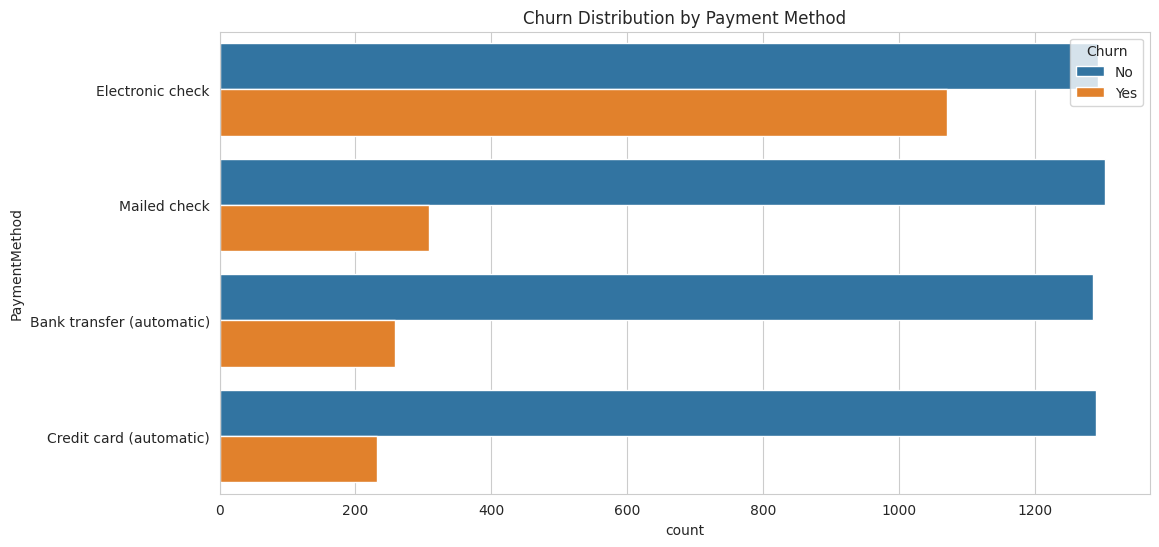

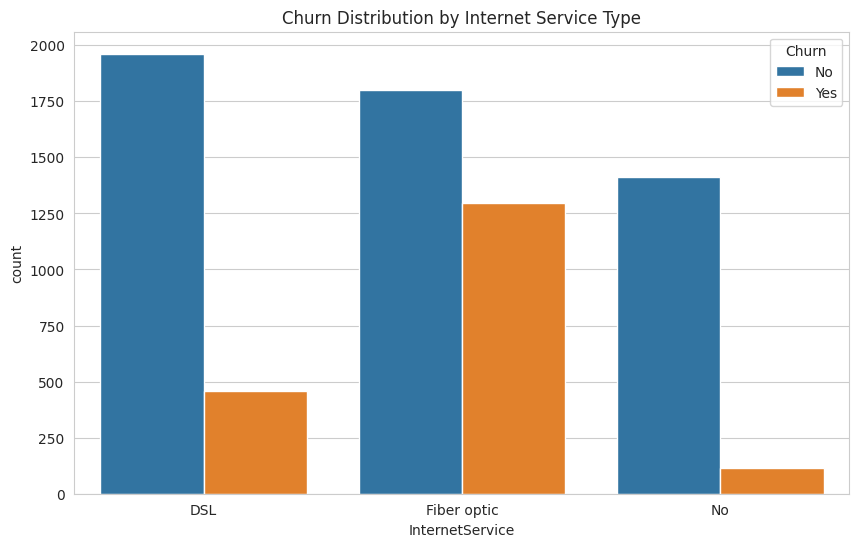

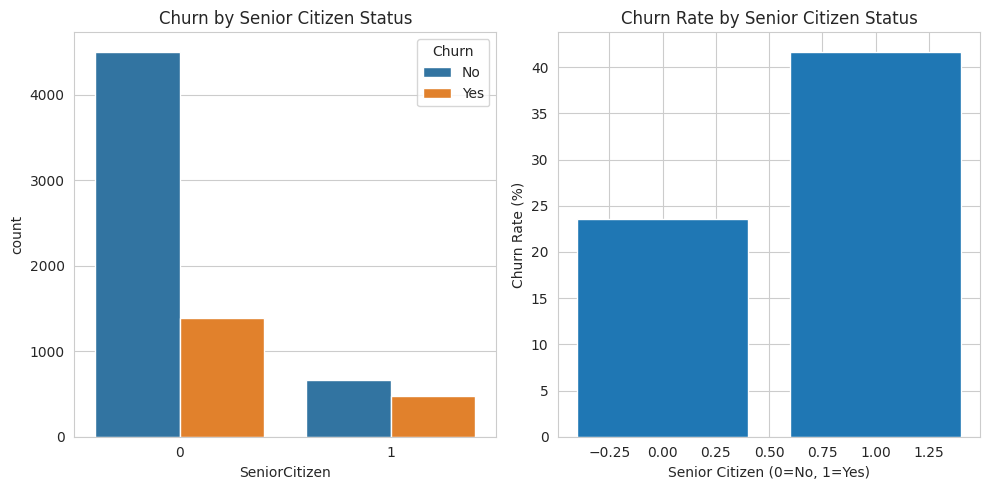

In [19]:
# === ADDITIONAL KEY VISUALIZATIONS ===

# Payment Method vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='PaymentMethod', hue='Churn')
plt.title('Churn Distribution by Payment Method')
plt.show()

# Internet Service Type vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Distribution by Internet Service Type')
plt.show()

# Senior Citizen analysis
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Churn by Senior Citizen Status')

plt.subplot(1, 2, 2)
senior_churn = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
plt.bar(senior_churn.index, senior_churn.values)
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()